In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-datasets/advertising.csv


# Projeto

A empresa quer saber qual a chance do usuário clicar no anuncio baseado nessas informações.

# Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as bp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ad_data = pd.read_csv('../input/my-datasets/advertising.csv')

# Análise exploratória dos dados

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

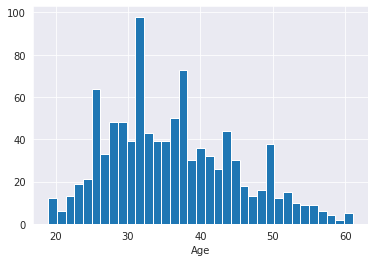

In [7]:
sns.set_style('darkgrid')
ad_data['Age'].hist(bins=35)
plt.xlabel('Age')

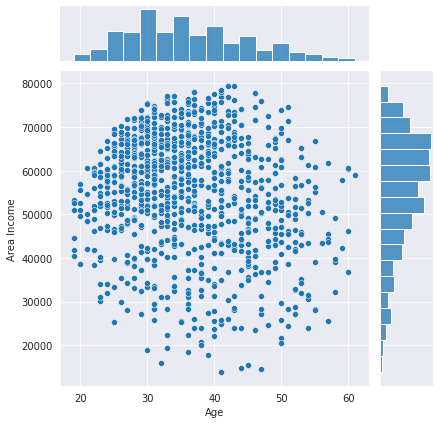

In [8]:
sns.jointplot(data=ad_data, y='Area Income', x='Age')

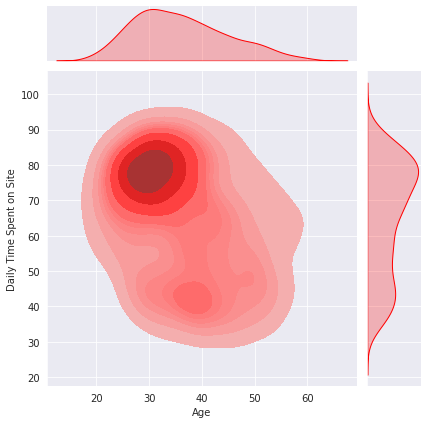

In [9]:
sns.jointplot(data=ad_data, y='Daily Time Spent on Site', x='Age', kind='kde', color='red', fill = True)

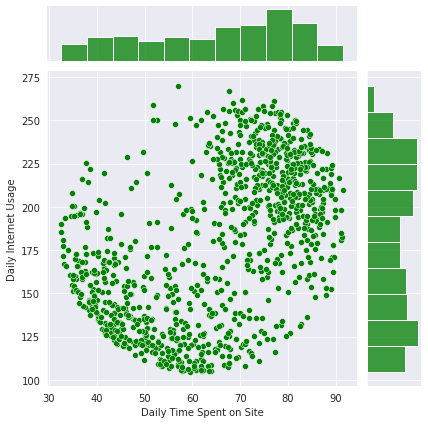

In [10]:
sns.jointplot(data=ad_data, y='Daily Internet Usage', x='Daily Time Spent on Site',color='green')

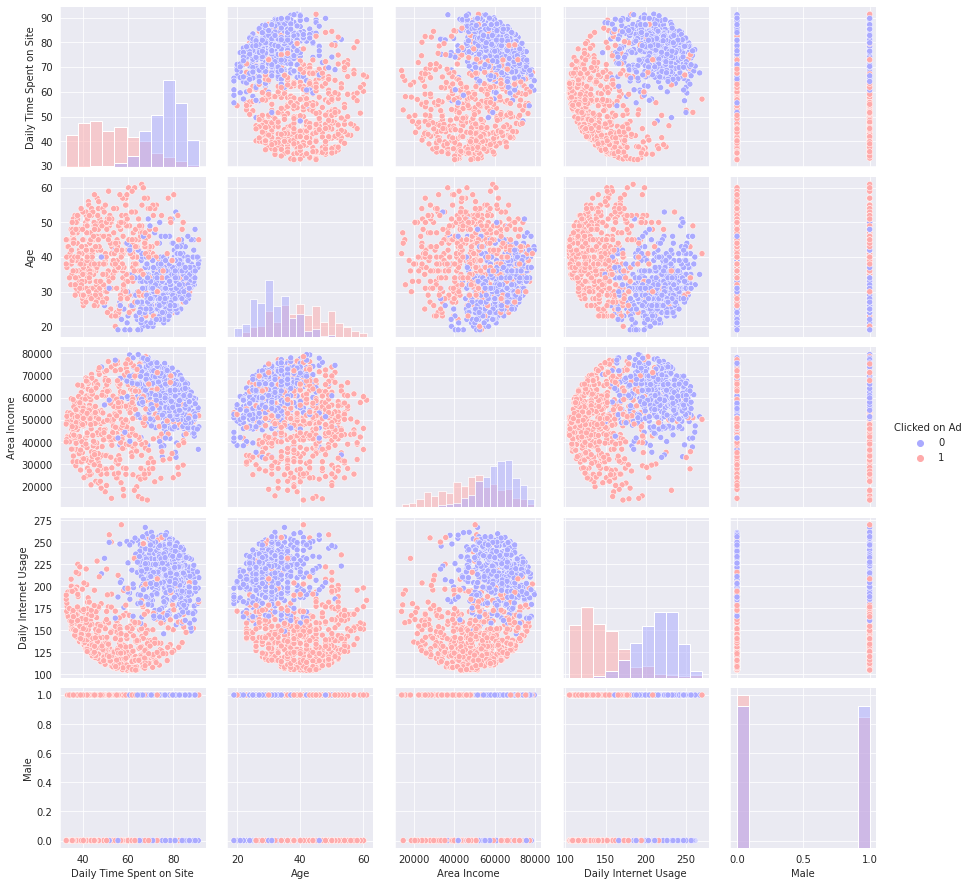

In [11]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='bwr', diag_kind='hist')

# Regressão logistica

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test=train_test_split(ad_data.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp'], axis=1), ad_data['Clicked on Ad'], )

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel= LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [16]:
predict = logmodel.predict(X_test)

# Avaliação do modelo

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
print(classification_report(y_test, predict))
print()
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       123
           1       0.89      0.86      0.88       127

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250


[[110  13]
 [ 18 109]]
